# Radar chart with my own function

It requires a dataframe for each player included (at the moment 1 or 2). Such a dataframe can be obtained by scraping data from FBref via *Scrape_Player_via_Link* in *FBref_PlayerData.py*: 

+ 'Variables' : Column with parameter names (e.g. 'Pass Completion %)
+ 'Percentiles' : Column with percentile values (e.g. 99)
+ 'Values' : Column with actual values (e.g. 93)

This dataframe should be filtered to include one row for each parameter meant to be plotted and no additional rows. This can be achieved via the function *param_select*. 

In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics')

In [2]:
from Create_Radar import create_radar_plotly, param_select
import plotly
from Basics.Data.FBref_Data import Scrape_Player_via_Link


df1, player1, pos1 = Scrape_Player_via_Link('https://fbref.com/en/players/2c0558b8/Jamal-Musiala')
df2, player2, pos2 = Scrape_Player_via_Link('https://fbref.com/en/players/74618572/Kaoru-Mitoma')

Select a position group out of ['vs. Att Mid / Wingers', 'vs. Midfielders'] as [0, 1] for Jamal Musiala:0
Select a position group out of ['vs. Att Mid / Wingers', 'vs. Midfielders'] as [0, 1] for Kaoru Mitoma:0


In [3]:
# Careful with FBref changing KPI names!
params = ['xAG: Expected Assisted Goals', 'Shot-Creating Actions', 'Pass Completion %', 'npxG: Non-Penalty xG', 'Progressive Passes',
          'Progressive Carries', 'Successful Take-Ons', 'Successful Take-On %']
df1 = param_select(df1, params, 'Variables')
df2 = param_select(df2, params, 'Variables')

radar_chart = create_radar_plotly(df1=df1, player1=player1, df2=df2, player2=player2, legend=True)

In [4]:
df2

Variables  Values  Percentiles
0  xAG: Expected Assisted Goals    0.19           56
1         Shot-Creating Actions    3.88           56
2             Pass Completion %   79.00           79
3          npxG: Non-Penalty xG    0.29           75
4            Progressive Passes    3.32           37
5           Progressive Carries    6.09           95
6           Successful Take-Ons    2.19           70
7          Successful Take-On %   40.80           31

In [5]:
df1

Variables  Values  Percentiles
0  xAG: Expected Assisted Goals    0.23           69
1         Shot-Creating Actions    4.67           79
2             Pass Completion %   85.40           98
3          npxG: Non-Penalty xG    0.21           47
4            Progressive Passes    5.79           86
5           Progressive Carries    4.36           78
6           Successful Take-Ons    4.17           99
7          Successful Take-On %   54.80           89

In [6]:
radar_chart.show()

# Radar chart with soccerplots

https://github.com/Slothfulwave612/soccerplots/blob/master/docs/radar_chart.md#changing-alpha-values-for-comparison-radar

The function requires data in a similar format as above. Some minor changes allows us to use the same data.

A proper percentile scaling of the axis, requires values for the range (i.e. 0th and 100th percentile). This can be achieved based on a large reference data set (see https://www.youtube.com/watch?v=cXtC2EOQj6Q). If data is available only for individual players, ranges can only be set arbitrarily. 


### Defintely looks better

[0.23, 4.67, 85.4, 0.21, 5.79, 4.36, 4.17, 54.8]


C:\Users\DavidB\AppData\Local\Temp\ipykernel_4116\95097011.py:32: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



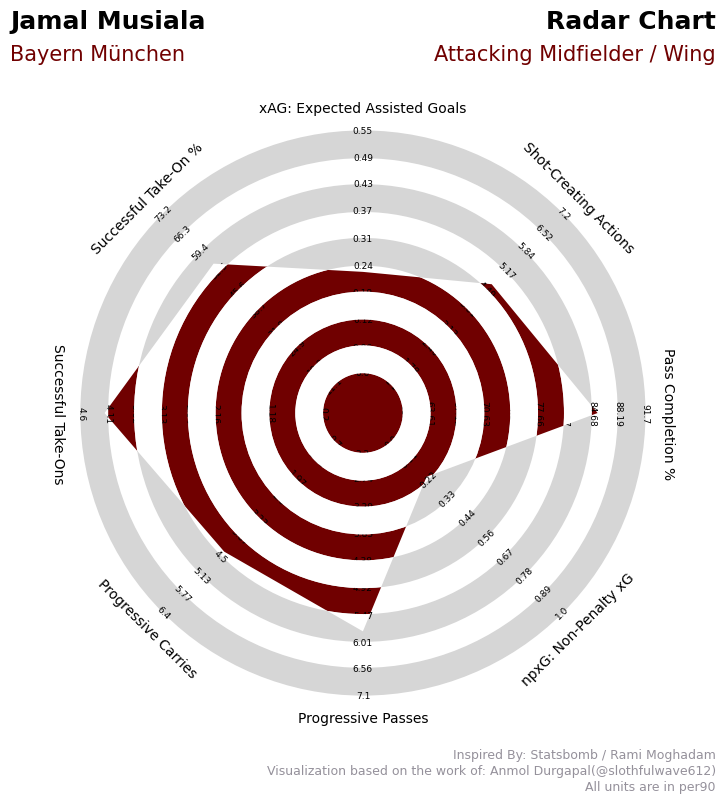

In [7]:
from soccerplots.radar_chart import Radar

# params = ['xAG', 'Shot-Creating Actions', 'Pass Completion %', 'Non-Penalty xG', 'Progressive Passes',
#          'Progressive Carries', 'Successful Take-Ons', 'Successful Take-On %']

ranges = [(0.0, 0.55), (1.1, 7.2), (60.1, 91.7), (0.0, 1.0), (2.2, 7.1), (0.7, 6.4), (0.2, 4.6), (11.1, 73.2)]
values = df1.Values.tolist()
print(values)
## title values
title = dict(
    title_name='Jamal Musiala',
    subtitle_name='Bayern München',
    subtitle_color='#700000',
    title_name_2='Radar Chart',
    subtitle_name_2='Attacking Midfielder / Wing',
    subtitle_color_2='#700000',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote 
endnote = "Visualization based on the work of: Anmol Durgapal(@slothfulwave612)\nAll units are in per90"

## instantiate object 
radar = Radar(fontfamily = 'sans-serif')

## plot radar -- image link: http://bit.do/ajax_img
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#700000', '#FFFFFF'], title=title,
                           endnote=endnote)

fig.show()

C:\Users\DavidB\AppData\Local\Temp\ipykernel_4116\412606712.py:33: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



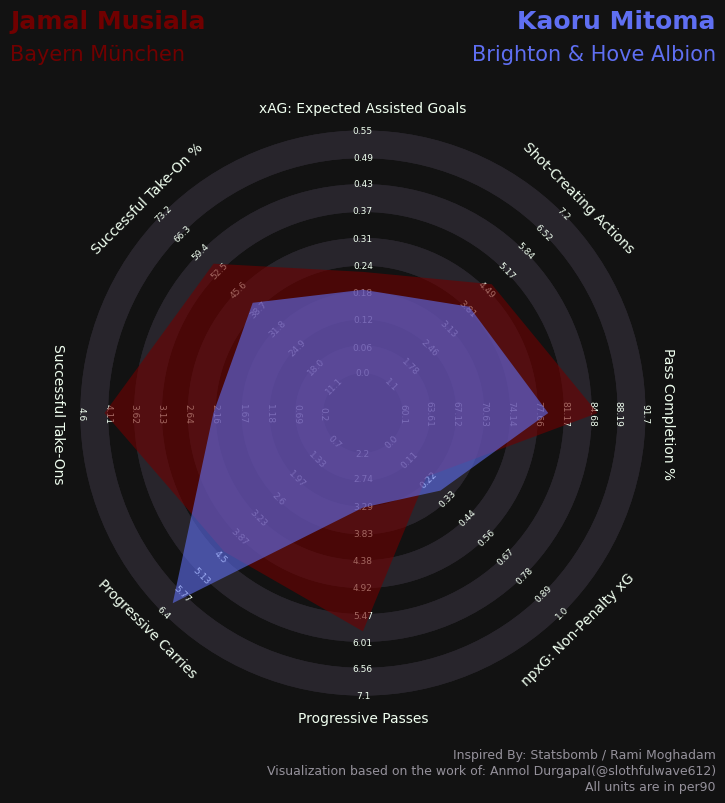

In [8]:
# params = ['xAG', 'Shot-Creating Actions', 'Pass Completion %', 'Non-Penalty xG', 'Progressive Passes',
#          'Progressive Carries', 'Successful Take-Ons', 'Successful Take-On %']
# this requires ranges --> unfortunately not scalable by percentile displaying actucal values
ranges = [(0.0, 0.55), (1.1, 7.2), (60.1, 91.7), (0.0, 1), (2.2, 7.1), (0.7, 6.4), (0.2, 4.6), (11.1, 73.2)]

values = [df1.Values.tolist(), df2.Values.tolist()]
## title values
title = dict(
    title_name='Jamal Musiala',
    subtitle_name='Bayern München',
    title_color = '#700000',
    subtitle_color='#700000',
    title_name_2='Kaoru Mitoma',
    subtitle_name_2='Brighton & Hove Albion',
    title_color_2 = '#5f6ff2',
    subtitle_color_2='#5f6ff2',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote 
endnote = "Visualization based on the work of: Anmol Durgapal(@slothfulwave612)\nAll units are in per90"

## instantiate object 
radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#F0FFF0",
              range_color="#F0FFF0", fontfamily = 'sans-serif')

## plot radar -- image link: http://bit.do/ajax_img
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#700000', '#5f6ff2'], title=title,
                           endnote=endnote, compare = True)

fig.show()

C:\Users\DavidB\AppData\Local\Temp\ipykernel_4116\1195533192.py:33: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



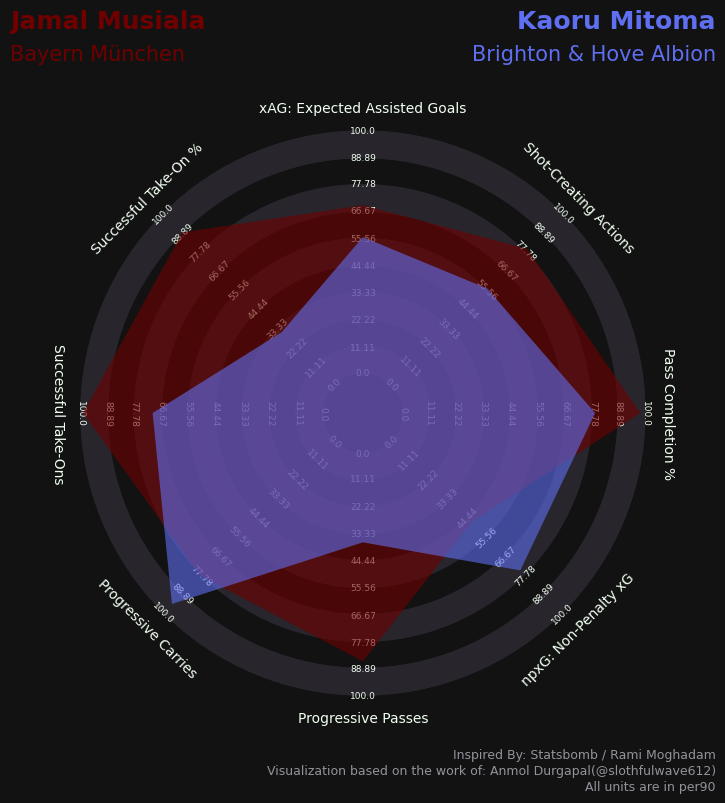

In [9]:
# params = ['xAG', 'Shot-Creating Actions', 'Pass Completion %', 'Non-Penalty xG', 'Progressive Passes',
#          'Progressive Carries', 'Successful Take-Ons', 'Successful Take-On %']

ranges = [(0.0, 100), (0, 100), (0, 100), (0.0, 100), (0, 100), (0, 100), (0, 100), (0, 100)]

values = [df1.Percentiles.tolist(), df2.Percentiles.tolist()]
## title values
title = dict(
    title_name='Jamal Musiala',
    subtitle_name='Bayern München',
    title_color = '#700000',
    subtitle_color='#700000',
    title_name_2='Kaoru Mitoma',
    subtitle_name_2='Brighton & Hove Albion',
    title_color_2 = '#5f6ff2',
    subtitle_color_2='#5f6ff2',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote 
endnote = "Visualization based on the work of: Anmol Durgapal(@slothfulwave612)\nAll units are in per90"

## instantiate object 
radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#F0FFF0",
              range_color="#F0FFF0", fontfamily = 'sans-serif')

## plot radar -- image link: http://bit.do/ajax_img
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#700000', '#5f6ff2'], title=title,
                           endnote=endnote, compare = True)

fig.show()

# Radar chart with mplsoccer

https://mplsoccer.readthedocs.io/en/latest/gallery/radar/plot_radar.html 


In [23]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

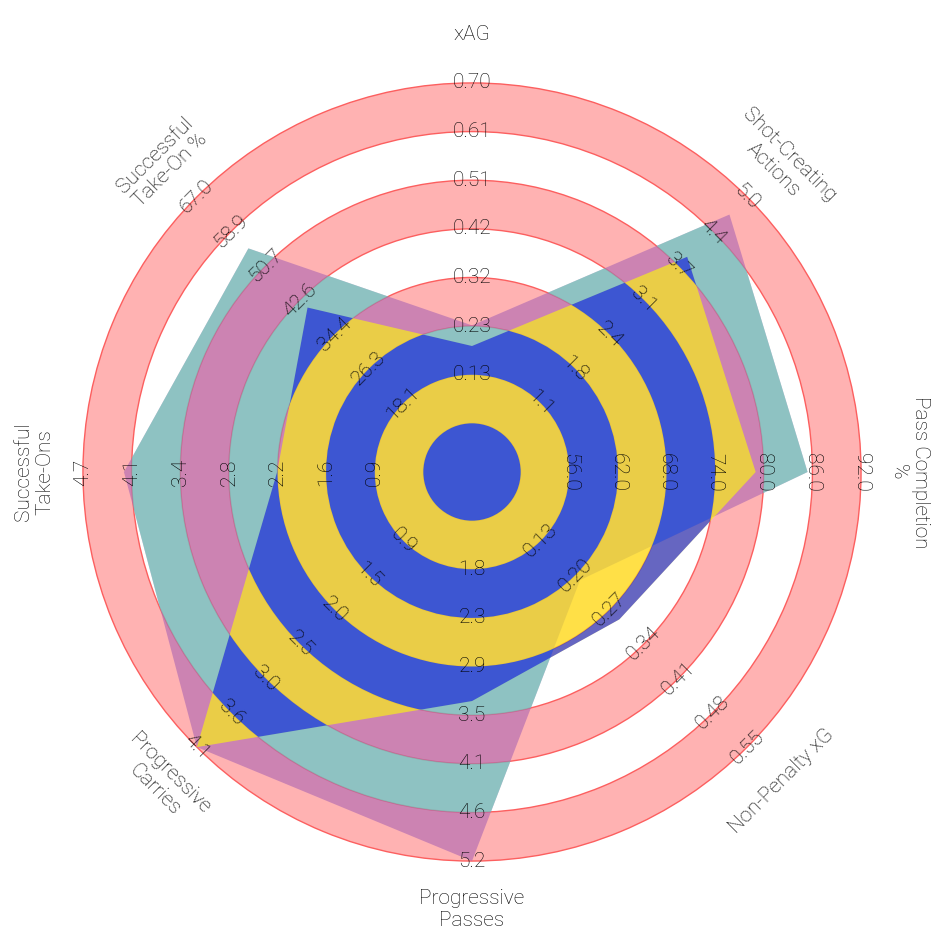

In [28]:
params = ['xAG', 'Shot-Creating Actions', 'Pass Completion %', 'Non-Penalty xG', 'Progressive Passes',
          'Progressive Carries', 'Successful Take-Ons', 'Successful Take-On %']
low = [0.04, 0.5, 50, 0.06, 1.2, 0.4, 0.3, 10]
high = [0.7, 5, 92, 0.55, 5.2, 4.1, 4.7, 67]


# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = []
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=7,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)
Musiala = df1.Values.tolist()
Mitoma = df2.Values.tolist()

fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(Musiala, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2', 'alpha': 0.6},
                                kwargs_rings={'facecolor': '#66d8ba', 'alpha': 0.6})  # draw the radar
radar_output = radar.draw_radar(Mitoma, ax=ax,
                                kwargs_radar={'facecolor': 'yellow', 'alpha': 0.6},
                                kwargs_rings={'facecolor': 'blue', 'alpha': 0.6})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels
